In [ ]:
!pip install seaborn


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
# Load the dataset
df = pd.read_csv('01_Melbourne_Residential.csv')


In [14]:
# Display basic info
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   Seller         13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float

In [15]:

# Display first few rows
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
         Suburb           Address  Rooms Type    Price Method         Seller  \
0  Airport West     154 Halsey Rd      3    t   840000     PI         Nelson   
1   Albert Park    105 Kerferd Rd      2    h  1275000      S  hockingstuart   
2   Albert Park  85 Richardson St      2    h  1455000      S        Thomson   
3    Alphington        6 Smith St      4    h  2000000      S          Brace   
4    Alphington   5/6 Yarralea St      3    h  1110000      S         Jellis   

       Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/9/2023      13.5      3042  ...         2  1.0       303         225.0   
1  3/9/2023       3.3      3206  ...         1  0.0       120          82.0   
2  3/9/2023       3.3      3206  ...         1  0.0       159           NaN   
3  3/9/2023       6.4      3078  ...         2  4.0       853         263.0   
4  3/9/2023       6.4      3078  ...         2  2.0       208           NaN   

   YearBuilt    CouncilArea L

In [16]:
# Check missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
Car               62
BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
dtype: int64


In [17]:
# Drop columns with too many missing values (>50%)
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

In [18]:
# Convert non-numeric columns to categorical
#df = pd.get_dummies(df, drop_first=True)

# Fill missing values for numerical columns with median
df.fillna(df.select_dtypes(include=[np.number]).median(), inplace=True)


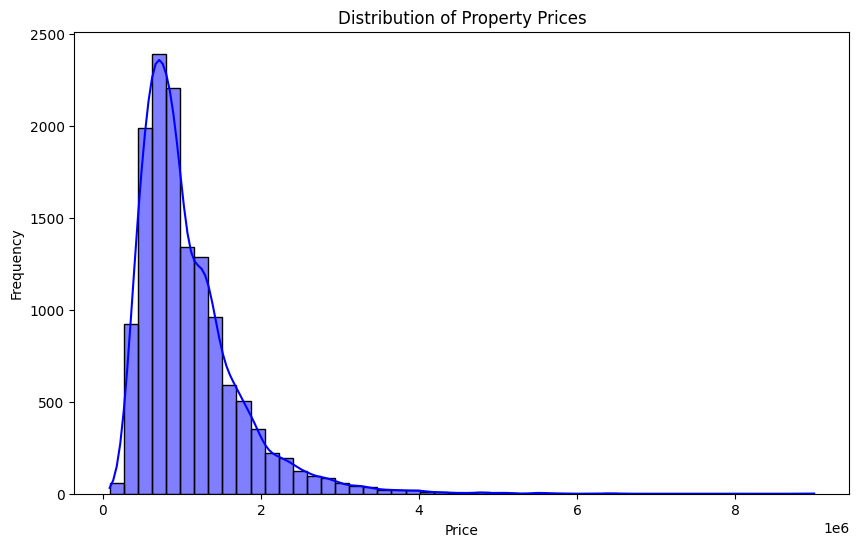

In [19]:
# Visualizing Price Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Price'].dropna(), bins=50, kde=True, color='blue')
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [21]:
# Remove 'CouncilArea' column if it exists
if 'CouncilArea' in df.columns:
    df = df.drop(columns=['CouncilArea'])
    print("'CouncilArea' column removed.")

'CouncilArea' column removed.


In [22]:
# Check missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
Series([], dtype: int64)


In [23]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   Seller         13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   13580 non-null  float64
 15  YearBuilt      13580 non-null  float64
 16  Lattitude      13580 non-null  float64
 17  Longtitude     13580 non-null  float

In [24]:
# Save cleaned dataset
df.to_csv('C:/Users/srira/OneDrive/MLOPS/individual/cleaned_melbourne_data.csv', index=False)
print("\nData Preprocessing Completed. Cleaned dataset saved.")





Data Preprocessing Completed. Cleaned dataset saved.
